In [1016]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re

In [1017]:
#genre_dict line is to map the document with genre ID numbers but not numbers.
genre_dict = {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}
df_ratings=pd.read_csv('imdb.title.ratings.csv.gz')
df_basics=pd.read_csv('imdb.title.basics.csv.gz')
df_gross=pd.read_csv('bom.movie_gross.csv.gz')
df_name_basics=pd.read_csv('imdb.name.basics.csv.gz')
df_title_akas=pd.read_csv('imdb.title.akas.csv.gz')
#df_budget=pd.read_csv('tn.movie_budgets.csv.gz')
df_TMDB=pd.read_csv('TMDB_cleaned.csv')
df_writers=pd.read_csv('Writersb.csv')

In [1018]:
df_ratings.head()
df_ratings.sort_values(by='numvotes',ascending=False)
#Would like to get movie titles, genres, and studios in this table to make more useful conclusions.
#Filter out ones with low amounts of numvotes

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


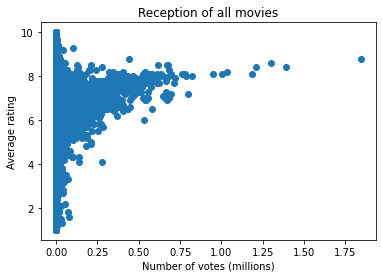

Correlation between ratings and other variables: 


numvotes         0.044478
averagerating    1.000000
Name: averagerating, dtype: float64

In [1019]:
fig, ax=plt.subplots()
popularity_subplot=ax.scatter(df_ratings['numvotes']/1e6,df_ratings['averagerating'])
ax.set_xlabel('Number of votes (millions)')
ax.set_ylabel('Average rating')
ax.set_title('Reception of all movies')
plt.show()

df_ratings.describe()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between ratings and other variables: ')
df_ratings.corr()['averagerating'].sort_values()

In [1020]:
df_ratings.isna().any()

tconst           False
averagerating    False
numvotes         False
dtype: bool

In [1021]:
#df_ratings_and_basics = pd.concat([df_ratings, df_basics], axis=1, join='inner')???

In [1022]:
df_ratings_basics.sort_values(by='numvotes',ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
39180,tt8050582,8.0,5,Jackal Stories,Cuentos de chacales,2017,70.0,Documentary
33886,tt6449270,4.0,5,Chu lian wei man,Chu lian wei man,2013,105.0,"Drama,Romance"
22243,tt3819584,7.6,5,De onderkoning: strijd om de grondwet,De onderkoning: strijd om de grondwet,2014,51.0,Drama
49605,tt2136926,5.8,5,Fools,Fools,2011,77.0,"Action,Comedy,Horror"


In [1023]:
#df_ratings_basics[df_ratings_basics['numvotes'] > 1000]
#Filter out movies without much publicity. These are irrelevant.

In [1024]:
#df_ratings_basics.head()

In [1025]:
#genres=[]
#for f in df_ratings_basics:
#    for g in f.strip('[]').split(','):
#        if not g in genres:
#            genres.append(g)

In [1026]:
#genres=set(list(map(lambda x: x.strip(' '),genres)))

In [1027]:
#for g in genres:
#    df_ratings_basics[g]=df_ratings_basics.apply(lambda x: g in x)

In [1028]:
#Merge the ratings and basics tables.
#df_ratings_basics=df_ratings.merge(df_basics, left_on='tconst',right_on='tconst')
#df_ratings_basics.head()

In [1029]:
#Generating a list of all genres
#genres = set()
#for genre_string in df_ratings_basics['genres']:
#   genre_list = genre_string.split(',')
#   for genre in genre_list:
#       genres.add(genre)
#genres = list(genres)

In [1030]:
#print(genres)

In [1031]:
#for g in genres:
#    df_ratings_basics_new[g]=df_ratings_basics_new['genres'].apply(lambda x: g in x)

In [1032]:
df_ratings_basics_new[['Animation', 'Sport', 'Mystery', 'Action', 'Comedy', 'Documentary', 'Romance', 'News', 'War', 'Horror', 'Fantasy', 'Family', 'Music', 'Musical', 'Sci-Fi', 'History', 'Biography', 'Thriller', 'Crime', 'Adventure', 'Drama']]*=1

In [1033]:
df_ratings_basics_new.head(100)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Animation,Sport,...,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,0,0,...,0,0,0,0,0,0,0,0,0,1
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,0,0,0,0,0,0,0,0,1,0
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt1515069,8.3,15,High on Hope,High on Hope,2010,72.0,"Documentary,Music",0,0,...,0,1,0,0,0,0,0,0,0,0
96,tt1515208,6.3,1447,Walking with the Enemy,Walking with the Enemy,2013,124.0,"Action,Drama,History",0,0,...,0,0,0,0,1,0,0,0,0,1
97,tt1516577,5.3,147,Sedona,Sedona,2011,90.0,"Adventure,Comedy,Drama",0,0,...,0,0,0,0,0,0,0,0,1,1
98,tt1516595,4.4,64,Trippin',Trippin',2011,88.0,"Comedy,Horror",0,0,...,0,0,0,0,0,0,0,0,0,0


In [1078]:
df_ratings_basics_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   averagerating    73052 non-null  float64
 2   numvotes         73052 non-null  int64  
 3   primary_title    73052 non-null  object 
 4   original_title   73052 non-null  object 
 5   start_year       73052 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           73052 non-null  object 
 8   Animation        73052 non-null  int64  
 9   Sport            73052 non-null  int64  
 10  Mystery          73052 non-null  int64  
 11  Action           73052 non-null  int64  
 12  Comedy           73052 non-null  int64  
 13  Documentary      73052 non-null  int64  
 14  Romance          73052 non-null  int64  
 15  News             73052 non-null  int64  
 16  War              73052 non-null  int64  
 17  Horror      

In [1034]:
#df_ratings_basics.iloc[3]['genres']
#df_ratings_basics.isna().sum()
#Consider dropping null values from genres column

In [1035]:
#df_ratings_basics_new=df_ratings_basics.dropna(subset=['genres'])

In [1036]:
#df_ratings_basics_new.head()
#df_ratings_basics_new.isna().sum()

In [1037]:
print(genres)

{'Animation', 'Sport', 'Mystery', 'Action', 'Comedy', 'Documentary', 'Romance', 'News', 'War', 'Horror', 'Fantasy', 'Family', 'Music', 'Musical', 'Sci-Fi', 'History', 'Biography', 'Thriller', 'Crime', 'Adventure', 'Drama'}


In [1038]:
df_basics.head(100).sort_values('genres',ascending=False)
#How to deal with comma-separated genres and break those apart. Use different columns?
#Create 3 columns? Analysis on top genres/studios/writers would be helpful.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
32,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller
29,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
97,tt0431021,The Possession,The Possession,2012,92.0,"Horror,Mystery,Thriller"
51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror
...,...,...,...,...,...,...
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN
35,tt0306058,Second Coming,Second Coming,2012,95.0,NaN
40,tt0326592,The Overnight,The Overnight,2010,88.0,NaN
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN


In [1039]:
df_gross_basics=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
df_gross_basics.sort_values(['domestic_gross'], ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
1528,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000,2018
2876,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
9,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
2283,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
2703,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 2,BV,608600000.0,634200000,2018
...,...,...,...,...,...,...,...,...,...,...,...
2083,tt2300975,Jessabelle,Jessabelle,2014,90.0,"Horror,Thriller",Jessabelle,LGF,NaN,7000000,2014
2322,tt2594078,Viral,Viral,2013,95.0,"Comedy,Horror,Thriller",Viral,W/Dim.,NaN,552000,2016
2323,tt2597892,Viral,Viral,2016,85.0,"Drama,Horror,Sci-Fi",Viral,W/Dim.,NaN,552000,2016
2324,tt3892200,Viral,Viral,2015,NaN,Horror,Viral,W/Dim.,NaN,552000,2016


In [1040]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1041]:
#Documentaries, sports movies? (And which ones would be considered sports movies?)
#Critic, customer reviews (Assuming Microsoft is more interested in critic reviews b/c more potentialpositive publicity there)
#Top writers, studios (recruiting)
#Most popular (stars), highest grossing ($)
#(Determine which studios are which)

#Diversity/inclusion (may need to set this aside, put in next steps)

In [1042]:
#df_budget['domestic_gross'] = df_budget['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
#Convert domestic gross into a number format so that we can do arithmetic with it.

In [1043]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279",335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350",-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747",303181382.0


In [1044]:
#df_budget['production_budget'] = df_budget['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [1045]:
#df_budget['profit'] = df_budget['domestic_gross'] - df_budget['production_budget']
#df_budget.head()

In [1046]:
df_budget.sort_values('profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,"$2,053,311,220",630662225.0
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,"$1,348,258,224",500059566.0
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,"$2,208,208,395",459363944.0
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,"$786,598,007",449998007.0
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,"$1,648,854,864",437270625.0
...,...,...,...,...,...,...,...
31,32,"May 18, 2012",Battleship,220000000.0,65233400.0,"$313,477,717",-154766600.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",-169536125.0
12,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,"$260,002,115",-185697885.0
13,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,"$282,778,100",-201941321.0


In [1047]:
#df_TMDB.head()

In [1048]:
#df_budget_TMDB=df_budget.merge(df_TMDB, left_on='movie',right_on='title')
#Merging the budget and TMDB tables on the movie titles to get the information we need in one dataframe.
df_budget_TMDB.sort_values(['vote_count'], ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,id_y,release_date_y,title,vote_average,vote_count,Year
117,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,"$835,524,642",132576195.0,27205,2010-07-16,Inception,8.3,22186,2010
484,56,"Feb 12, 2016",Deadpool,58000000.0,363070709.0,"$801,025,593",305070709.0,293660,2016-02-12,Deadpool,7.6,20175,2016
20,35,"Aug 14, 1998",The Avengers,60000000.0,23385416.0,"$48,585,416",-36614584.0,24428,2012-05-04,The Avengers,7.6,19673,2012
19,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,"$1,517,935,897",398279547.0,24428,2012-05-04,The Avengers,7.6,19673,2012
110,32,"Nov 5, 2014",Interstellar,165000000.0,188017894.0,"$666,379,375",23017894.0,157336,2014-11-05,Interstellar,8.2,18597,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,43,"Apr 7, 2006",Simon,1300000.0,4055.0,"$1,738,663",-1295945.0,259712,2017-02-01,Simon,0.0,1,2017
1966,35,"May 22, 2009",The Girlfriend Experience,1300000.0,695840.0,"$1,005,840",-604160.0,496053,2014-10-05,The Girlfriend Experience,5.0,1,2014
1965,28,"Dec 31, 2014",House at the End of the Drive,1400000.0,0.0,$0,-1400000.0,280381,2014-01-11,House at the End of the Drive,8.0,1,2014
1067,43,"Jul 27, 2016",Nerve,20000000.0,38583626.0,"$70,652,284",18583626.0,455240,2011-12-07,Nerve,10.0,1,2011


In [1049]:
#df_budget_TMDB.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)
#Save as a csv to the desktop

In [1050]:
#df_gross_basics.head()

In [1051]:
#df_budget_TMDB.head()

In [1052]:
#df_ratings_basics.head()

In [1053]:
#df_gross_basics.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)

In [1054]:
#Another table merge.
#df_main_table=df_budget_TMDB.merge(df_ratings_basics,left_on='movie',right_on='primary_title')

In [1055]:
#df_main_table.head()

In [1056]:
#df_gross_basics.to_csv (r'/Users/jresis/Desktop/df_main_table.csv', index = False, header=True)
#Making a main table with all the fields we need, converting to a csv file.

In [1057]:
#df_main_table.head()

In [1058]:
#df_main_table.to_csv (r'/Users/jresis/Desktop/df_budget_TMDB.csv', index = False, header=True)

In [1059]:
df_writers.head()

,tconst,category,primary_name,birth_year,death_year
0,tt1563675,writer,Esther Goris,1963.0,NaN
1,tt0417610,writer,Adolfo Bioy Casares,1914.0,1999.0
2,tt3244416,writer,Adolfo Bioy Casares,1914.0,1999.0
3,tt3864934,writer,Adolfo Bioy Casares,1914.0,1999.0
4,tt0469152,writer,Gary O. Bennett,1953.0,NaN


In [1060]:
#df_2=df_main_table.merge(df_writers,left_on='tconst',right_on='tconst')

In [1061]:
#df_2.info()

In [1062]:
#df_2.to_csv (r'/Users/jresis/Desktop/df_2.csv', index = False, header=True)

In [1063]:
df_ratings_basics_3=df_ratings.merge(df_basics, left_on='tconst',right_on='tconst')
df_ratings_basics_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [1064]:
#df_gross_basics_3=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
#df_gross_basics_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 0 to 3365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3366 non-null   object 
 1   primary_title    3366 non-null   object 
 2   original_title   3366 non-null   object 
 3   start_year       3366 non-null   int64  
 4   runtime_minutes  3198 non-null   float64
 5   genres           3326 non-null   object 
 6   title            3366 non-null   object 
 7   studio           3363 non-null   object 
 8   domestic_gross   3342 non-null   float64
 9   foreign_gross    2043 non-null   object 
 10  year             3366 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 315.6+ KB


In [1065]:
df_3=df_ratings_basics_3.merge(df_writers,left_on='tconst',right_on='tconst')

In [1068]:
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            23050 non-null  int64  
 1   release_date  23050 non-null  object 
 2   title         23050 non-null  object 
 3   vote_average  23050 non-null  float64
 4   vote_count    23050 non-null  int64  
 5   Year          23050 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [1076]:
df_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74357 entries, 0 to 74356
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tconst        74357 non-null  object 
 1   category      74357 non-null  object 
 2   primary_name  74357 non-null  object 
 3   birth_year    13341 non-null  float64
 4   death_year    2447 non-null   float64
dtypes: float64(2), object(3)
memory usage: 2.8+ MB


In [ ]:
df_4=df_writers.merge(df_writers,left_on='tconst',right_on='tconst')

In [1071]:
df_TMDB.head()

,id,release_date,title,vote_average,vote_count,Year
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,10191,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,10138,2010-05-07,Iron Man 2,6.8,12368,2010
3,27205,2010-07-16,Inception,8.3,22186,2010
4,32657,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010


In [1072]:
df_writers.head()

,tconst,category,primary_name,birth_year,death_year
0,tt1563675,writer,Esther Goris,1963.0,NaN
1,tt0417610,writer,Adolfo Bioy Casares,1914.0,1999.0
2,tt3244416,writer,Adolfo Bioy Casares,1914.0,1999.0
3,tt3864934,writer,Adolfo Bioy Casares,1914.0,1999.0
4,tt0469152,writer,Gary O. Bennett,1953.0,NaN


In [1079]:
df_TMDB.head()

,id,release_date,title,vote_average,vote_count,Year
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,10191,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,10138,2010-05-07,Iron Man 2,6.8,12368,2010
3,27205,2010-07-16,Inception,8.3,22186,2010
4,32657,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010


In [1082]:
#df_6=df_ratings_basics_new.merge(df_TMDB,left_on='primary_title',right_on='title')

In [1084]:
#df_6.to_csv (r'/Users/jresis/Desktop/df_6.csv', index = False, header=True)

In [1085]:
#df_7=df_6.merge(df_writers,left_on='tconst',right_on='tconst')

In [1086]:
#df_7.to_csv (r'/Users/jresis/Desktop/df_7.csv', index = False, header=True)

In [1089]:
#df_7.isna().sum()

In [1090]:
df_7.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Animation,Sport,...,id,release_date,title,vote_average,vote_count,Year,category,primary_name,birth_year,death_year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Sean Hood,1966.0,NaN
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Daniel Giat,1955.0,NaN
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,...,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Giulio Steve,NaN,NaN
3,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,...,74447,2010-10-26,The Hammer,6.5,16,2010,writer,Eben Kostbar,NaN,NaN
4,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,...,74447,2010-10-26,The Hammer,6.5,16,2010,writer,Joseph McKelheer,NaN,NaN
